# CHAPTER XI

# Ordinary Differential Equations: Boundary Value Problems
&copy; Harishankar Manikantan, maintained on GitHub at [hmanikantan/ECH60](https://github.com/hmanikantan/ECH60) and published under an [MIT license](https://github.com/hmanikantan/ECH60/blob/master/LICENSE). 

Return to [Course Home Page](https://hmanikantan.github.io/ECH60/)

**[(11.1) Linear Boundary Value Problems](#BVP)**
*  [Shooting method](#shooting) <br>
*  [Finite difference method](#FD) <br>

**[(11.2) Inbuilt Python Functions](#inbuilt)**

**[(11.3) Extending to Partial Differential Equations](#PDE)**

**[Practice problems](#exer)**



<a id='BVP'></a>



## (11.1) Linear Boundary Value Problems

Often, differential equations have conditions that need to be met at *multiple* locations of the independent variable. Such problems are called *boundary* value problems, as the different locations where conditions are satsfied are typically at the edges of the domain. Initial value problems (IVP) are common when things change with time: so an initial condition is known but a final condition is not prescribed. Boundary value problems (BVP) are common in differential equations with space as the independent variable: so the boundary conditions are specified at the edges of a shape.


An N-th order differential equation (both IVP and BVP) needs N conditions to uniquely determine a particular solution. Since even the simplest 1D problem has 2 boundaries (left and right edges of the independent variable for 1D problems), BVPs are at least 2nd order. A common way to write a linear 2nd order BVP for an unknown $T(x)$ in the range $x\in[a,b]$ is:

$$ \frac{d^2 T}{d x^2} + a(x) \frac{dT}{dx} + b(x) T = c(x),$$


where $a(x)$, $b(x)$, and $c(x)$ are known functions (or constants or even zero). Specifying the value of the dependent variable $T$ at the ends give rise to *Dirichlet* boundary conditions:

$$T(x=a)=T_a, \qquad T(x=b)=T_b.$$

Alternatively, depending on the physical problem, we might need to specify the derivative at the ends leading to *Neumann* boundary conditions:

$$ \left. \frac{dT}{dx} \right|_{x=a}=q_a, \qquad \left. \frac{dT}{dx} \right|_{x=b}=q_b.$$

Some cases might have combinations of the two or one on either end. The ideas in the following sections apply to any such combination. 

The transport of heat, solutes, or fluids often give rise to BVPs; we will use a simple heat transfer problem in what follows. The methods in sections 10.1 are restricted to linear BVPs. Numerical methods for nonlinear BVPs can constructed using similar ideas; however, once we understand the basic logic, it's far easier to simply use python's inbuilt BVP solver for nonlinear problems as described in 10.2.

<a id='shooting'></a>



###  Shooting method

Consider the temperature distribution in a conducting metallic rod. The rod is cylindrical in cross-section with radius $r$, length $L$, and thermal conductivity $k$, and is maintained at temperature $T_a$ and $T_b$ at the ends. The rod also loses heat to the surrounding air (ambient temperature $T_{air}$) via convection with a convective heat transfer coefficient $h$. It can be shown using the governing equations of heat transfer that such a rod obeys the 1D boundary value problem in $x$ (along the long axis of the rod):

$$ k \frac{d^2 T}{d x^2} + \frac{2h}{r} (T_{air}-T) = 0 ,\qquad T(x=0)=T_a,\qquad T(x=L)=T_b.$$


To solve this numerically, we first rewrite it as:

$$ \frac{d^2 T}{d x^2} = \frac{2h}{kr} (T-T_{air}), $$

from which we can express this as a system of two first-order ODEs, like we have done with IVPs before (tutorial 9):

$$ \frac{dT}{dx} = Q,\qquad \frac{dQ}{dx} =\frac{2h}{kr} (T-T_{air}). $$

This is in the 'standard' slope-function form:

$$ \frac{dT}{dx} = f_T(x,T,Q),\qquad \frac{dQ}{dx}  = f_Q(x,T,Q). $$

If we now had *initial* conditions for both $T(x=0)$ and $Q(x=0)$, we could solve this using the methods from tutorial 9. However, we only have $T(x=0)=T_a$ at the left end. We know nothing about $Q(x=0)$, and we are somehow required to also satisfy $T(x=L)=T_b$ on the right end!

One way to solve this system, then, is to *guess* an initial condition for $Q(x=0)=Q_{a1}$ and proceed as if this were a normal IVP. If the solution for $T(x)$ somehow magically satisfies the right boundary condition $T_b$ on the right, we are done! Most of the time, however, we will obviously land some where else with $T(x=L)=T_{b1} \neq T_b$. 

But let's guess anyway. Let's try this with $L=4\,{\rm m}$, $r=0.1\,{\rm m}$, $T_a=400\,{\rm K}$, $T_b=450\,{\rm K}$, $k=200\,{\rm J/K/m/s}$, $h=2\,{\rm J/K/m^2/s}$, and ambient temperature $T_{air}=300\,{\rm K}$. We can use our RK methods of the inbuilt `odeint` to solve the system of IVPs with a guessed initial value of $Q(x=0)=Q_{a1}$:

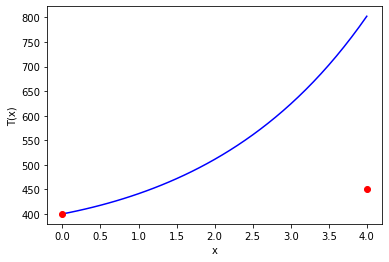

temperature at right end is 802.5432, we need 450.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si


# parameters
L=4
r=0.1
Ta=400
Tb=450
Tair=300
k=200
h=2

# guess initial condition for Q (try different values)
Qa1=30

# spatial range
dx=0.1
x=np.arange(0,L+dx,dx)


# format for using odeint: both function in a list form
def F(Y,x): return [Y[1],2*h/(k*r)*(Y[0]-Tair)]

# initial condition array with guess Qa1
Y0=[Ta,Qa1]

# perform odeint solution
Y=si.odeint(F,Y0,x)

# unpack output to get temperature
T=Y[:,0]

# plot
plt.plot(x,T,'b')
# plot boundary conditions to compare
plt.plot(x[0],Ta,'ro')
plt.plot(x[-1],Tb,'ro')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.show()

Tb1=T[-1]
print('temperature at right end is %.4f, we need %.4f' %(Tb1,Tb))

Clearly, we are far from the actual right boundary condition of $T_b=450\,{\rm K}$. However, the 'wrong' value at the right end $T_{b1}$ is still useful. To see this, let's play the same guessing game one more time with another guess for the left boundary condition with $Q(x=0)=Q_{a2}$.

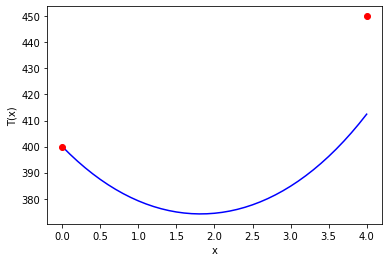

temperature at right end is 412.4314, we need 450.0000


In [3]:
# new guess initial condition for Q
Qa2=-30

# initial condition array with new guess Qa2
Y0=[Ta,Qa2]

# perform odeint solution
Y=si.odeint(F,Y0,x)

# unpack output to get temperature
T=Y[:,0]

# plot
plt.plot(x,T,'b')
# plot boundary conditions to compare
plt.plot(x[0],Ta,'ro')
plt.plot(x[-1],Tb,'ro')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.show()

Tb2=T[-1]
print('temperature at right end is %.4f, we need %.4f' %(Tb2,Tb))

This time we get yet another 'wrong' value at the right end which we will call $T_{b2}$. In general, for each guess $Q_{an}$, we would get a new right-end temperature $T_{bn}$. In other words, $T_{b}$ is a function of $Q_a$. And if we had enough data sets, we could interpolate between different values of $Q_a$  to get the 'correct' guess that would land us at the desired correct boundary condition $T_b$. 

This strategy of guessing, collecting enough data points, and eventually finding the 'correct' guess is called *shooting* method: we are essentially shooting in the dark to get a sense of where we land, and then calibrating our 'shot' so as to land exactly where we want to.

In general, we might need many sets of guesses and right-end values $(Q_{an},T_{bn})$ to perform a sufficiently accurate interpolation. For a linear ODE, however, the interpolant has to be linear! Which means we can uniquely identify the interpolant with two data points, and we already have two guesses and results. The equation for a linear function $f(Q_a)$ of the independent value $Q_a$ that passes through $(Q_{a1},T_{b1})$ and $(Q_{a2},T_{b2})$ is (recall Lagrange polynomials)

$$ f (Q_a)= \frac{Q_a-Q_{a1}}{Q_{a2}-Q_{a1}} T_{b2} + \frac{Q_a-Q_{a2}}{Q_{a1}-Q_{a2}} T_{b1}  $$

We need to find the $Q_a$ for which this function equals the *correct* right-end boundary conditions $f (Q_a)=T_b$. Substituting and simplifying gives:

$$ Q_a = Q_{a1} + \frac{Q_{a2}- Q_{a1}}{T_{b2}- T_{b1}} \left(T_{b}- T_{b1} \right)  $$

We can find the correct initial value $Q_a$ using the guesses and two 'wrong' right-end temperatures so far:

In [4]:
Qa=Qa1+(Qa2-Qa1)/(Tb2-Tb1)*(Tb-Tb1)
print('Actual boundary condition on Q at left end: %.4f' %Qa)

Actual boundary condition on Q at left end: -24.2219


This value has to be unique regardless of the two guesses because the system is linear, and any two points must uniquely define the interpolant. Try it. Pick some other guesses and run the IVP versions, get any two 'wrong' right-end temperatures, and interpolate to get the 'correct' left-end $Q_a$ boundary condition. Verify that we always get the same $Q_a$.


This 'correct' guess for the IVP should land us at the true boundary condition $T_b$. So, we run one more IVP with this correct initial condition on $Q$, and that would be desired solution to our original BVP:

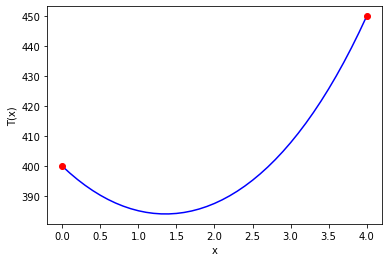

temperature at right end is 450.0000, we need 450.0000


In [5]:
# initial condition array with correct Qa
Y0=[Ta,Qa]

# perform odeint solution
Y=si.odeint(F,Y0,x)

# unpack output to get temperature
T=Y[:,0]

# plot
plt.plot(x,T,'b')
# plot boundary conditions to compare
plt.plot(x[0],Ta,'ro')
plt.plot(x[-1],Tb,'ro')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.xlabel("x")
plt.ylabel("T(x)")
plt.show()

# extract last point in solution array to compare with Tb
Tb_final=T[-1]
print('temperature at right end is %.4f, we need %.4f' %(Tb_final,Tb))

We see that we are able pin the exact right-end temperature. In essence, we transformed our BVP to a system of IVPs, used two guesses, and used linear interpolation to find the correct initial condition that would solve the problem. 

More generally, nonlinear problems cannot be solved using linear interpolations, and these are beyond the scope of this course. But the idea is the same. Once we are able to track the predicted right-end condition as a function of some guessed left-end condition, we can perform a root-finding algorithm to find the correct 'root' that would take us within sufficient tolerance of the required right boundary condition. This will require several rounds of solving the IVP system. Once the 'correct' guess is determined, we would solve once more and obtain the final solution. The inbuilt python solve `solve_bvp` uses a version of this strategy, and is described in section [11.2](#inbuilt) below.




<a id='FD'></a>



### Finite Difference Methods


A more commonly used approach to solving BVPs is finite differences. The strategy is to rewrite the same differential equation from above,

$$ k \frac{d^2 T}{d x^2} + \frac{2h}{r} (T_{air}-T) = 0 ,$$

using finite differences we learnt about in tutorial 7. Using second-order accurate center differences, this ODE can be written as 

$$ k \frac{T_{i+1}- 2 T_i +T _{i-1}}{\Delta x^2} + \frac{2h}{r} (T_{air}-T_i) = 0 $$

for a set of points $x_i$ along the rod separated by a gap size $\Delta x$. We can rearrange this with unknowns on one side (remember the ambient temperature $T_{air}$ is a known constant) to get:

$$  T_{i-1} -  \left( 2 + \frac{2h\Delta x^2}{k r} \right)T_i  + T_{i+1} = -\left( \frac{2h\Delta x^2}{k r} \right) T_{air}. $$

Or, defining $\alpha = 2 h \Delta x ^2 /kr$ for convenience:

$$  T_{i-1} -  \left( 2 + \alpha \right)T_i  + T_{i+1} = -\alpha T_{air}. $$

This is a *linear* algebraic equation relating the unknown temperatures at any three adjacent points. So, we can write as many of these equations as there are points along the rod.

The end points require special attention though. If there are $N$ points along the rod, so that $i=0,1,\ldots,N-1$, we already know the temperature at $i=0$ and $i=N-1$: these are indeed the provided boundary conditions. So, in the finite difference equation centered around second point from the left, the term $T_{i-1}$ is simply the left boundary condition $T_0 = T_a$ which gives: 

$$  T_a -  \left( 2 + \alpha \right)T_1  + T_{2} = -\alpha T_{air}  .$$

Similarly, using the right boundary condition $T_{N-1} = T_b$ for the finite difference equation at $i=N-2$ gives

$$  T_{N-3}-  \left( 2 + \alpha \right)T_{N-2}  +T_b = -\alpha T_{air}  .$$

For every other point, the original three-term form works. Writing all these finite difference equations in sequence gives a system of $N-2$ linear equations for $N-2$ unknowns $T_1,T_2 ,\ldots ,T_{N-2}$:

$$\begin{matrix} -(2+\alpha)T_1 + T_2 = -\alpha T_{air} - T_a \\T_1 -  \left( 2 + \alpha \right)T_2  + T_3 = -\alpha T_{air}\\ T_{2} -  \left( 2 + \alpha \right)T_3  + T_4 = -\alpha T_{air} \\ \vdots \\ T_{N-4} -  \left( 2 + \alpha \right)T_{N-3}  + T_{N-2} = -\alpha T_{air}\\ T_{N-3} -  \left( 2 + \alpha \right)T_{N-2}= -\alpha T_{air} -T_b \end{matrix}$$

Or, in matrix form:

$$\begin{bmatrix}-(2+\alpha) & 1 & 0 & 0 & 0 & \ldots \\1 & -(2+\alpha) & 1 & 0 & 0 & \ldots \\ 0 & 1 & -(2+\alpha) & 1 &0 &  \ldots\\  & \ddots &  \\ & &&\ddots \\ \ldots &0 & 0& 1 & -(2+\alpha) & 1 \\ \ldots &0 & 0 & 0 & 1 & -(2+\alpha) \end{bmatrix} \begin{bmatrix} T_1 \\ T_2 \\ T_3 \\ \vdots \\ \vdots \\ T_{N-3}\\ T_{N-2} \end{bmatrix}= \begin{bmatrix} -\alpha T_{air} - T_a \\-\alpha T_{air} \\ -\alpha T_{air} \\ \vdots \\ \vdots \\-\alpha T_{air}\\ -\alpha T_{air} -T_b  \end{bmatrix}$$

Not that the first and last term on the right-hand side column vector are corrected by the boundary conditions at $i=0$ and $i=N-1$, respectively. Solving our temperature differential equation, therefore, reduces to solving this linear system of equations. And we have developed many ways to doing this efficiently. In fact, this is a tridiagonal matrix system and we could even use specialized matrix solvers. The following code solves for $T_i(x_i)$ using a straightforward `linalg.solve` routine:

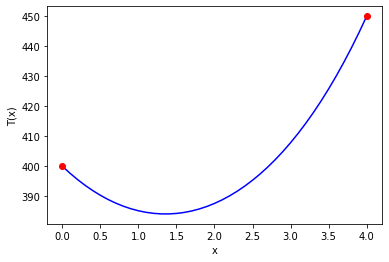

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# define paramters
L=4
r=0.1
Ta=400
Tb=450
Tair=300
k=200
h=2

# spatial range, find size N
dx=0.1
x=np.arange(0,L+dx,dx)
N=len(x)
# or, alternatively, define N first and use linspace


# define alpha
a=2*h*dx**2/k/r


# create matrix, first a diagonal matrix
M=-(2+a)*np.eye(N-2)
# then off-diagonal terms
for i in range(N-3):
    # terms to right of diagonal
    M[i,i+1]=1
    # terms below diagonal
    M[i+1,i]=1

# create RHS column vector, first fill with -alpha*T_air
b=-a*Tair*np.ones((N-2,1))
# correct first and last entry in column
b[0]-=Ta
b[-1]-=Tb

# solve
T=np.linalg.solve(M,b)

# T now only contains i=1 to i=N-2
# append Ta to left and Tb to right to complete
T=np.append(Ta,T)
T=np.append(T,Tb)

# plot
plt.plot(x,T,'b')
# plot boundary conditions to compare
plt.plot(x[0],Ta,'ro')
plt.plot(x[-1],Tb,'ro')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.show()

We obtain identical results as with our shooting method. The advantage of the finite difference method is that it only takes one 'shot' to find the solution, instead of repeated guesses.

We can incorporate Neumann boundary conditions (where derivatives are known rather than the value at the boundary) to the finite difference method by expressing the boundary condition itself as a finite difference of consistent order of accuracy. For example, if the right boundary is the same ($T(L)=T_b$) but the left boundary condition were instead the 'no flux' condition

$$ \left. \frac{dT}{dx} \right|_{x=0} = 0, $$

then we would write the second-order accurate one-sided finite difference for the first derivative:

$$ \frac{-3T_0 + 4T_{1}  -T_{2}}{2 \Delta x} = 0. $$

Note that $T_0$ is unknown in this case, so this above relation becomes an additional equation in our linear system of $N-1$ unknowns. Try solving this system. This is practice problem 1.

<a id='inbuilt'></a>



## (11.2) Inbuilt Python Functions

The submodule `scipy.integrate` contains the function `solve_bvp` which implements an iterative method to numerically estimate solutions to BVPs. This routine can handle nonlinear equations, and any boundary conditions, and is a good tool to get comfortable with to quickly solve any BVP. 

To use `solve_bvp`, first define a vectorized function `F(x,Y)` with arguments `x` the independent variable and a list `Y` denoting the right-hand side slope function of the system of first-order ODEs. In the temperature example from above, `Y` would contain $[f_T,f_Q]$ (similar to the usage of `odeint` in tutorial 9). 

Then, define a boundary condition *function* `bc` that takes two arguments `Ya` and `Yb` which are both arrays containing the values of `Y` at the boundary locations $a$ and $b$. A second-order differential equation reduces to a system of two first-order equations: `Ya` and `Yb` would be a two-element array in the temperature example above with `Ya[0]` and `Yb[0]` representing $T$, and `Ya[1]` and `Yb[1]` representing $Q$. This function should return all boundary conditions in the root-solving form (meaning equal to zero when the boundary condition is satisfied). For example, if the boundary condition is $T(a)=T_a$ at the left end, the function `bc` would return `Ya[0]-T_a` as one of its outputs. If the boundary condition is $dT/dx=Q=0$ at the right end, the function `bc` would return `Yb[1]`.

Then, set an initialized array `yinit` and call the function as `sol=solve_bvp(F, bc, x, yinit)`. The resulting object `sol` contains many outputs (details of the implementation and advanced usage can be found in the [official documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_bvp.html)). For simple implementation, we can extract the solution $T(x)$ which is the first entry in the solution vector as `sol.sol(x)[0]` (the second variable $Q(x)$, if we needed it, would be `sol.sol(x)[1]`). The following code solves the same problem as above. 

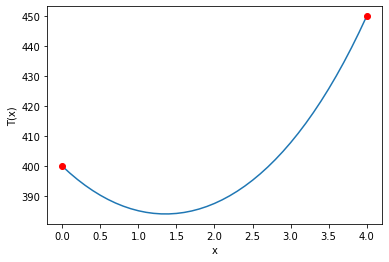

In [27]:
# parameters
L=4
r=0.1
Ta=400
Tb=450
Tair=300
k=200
h=2

# define right hand side of first-order ODE system
def F(x,Y): return [Y[1],2*h/(k*r)*(Y[0]-Tair)]

# define residuals of boundary conditions
def bc(Ya, Yb): return [Ya[0]-400, Yb[0]-450]

# range of independent variable
x = np.arange(0, L+0.1, 0.1)

# initialize dependedentarray
yinit = np.zeros((2, x.size))

# solve and write to an object (pick any name, here 'sol')
sol = si.solve_bvp(F, bc, x, yinit)

# obtain first dependent variable (T in this case)
y = sol.sol(x)[0]

# plot
plt.plot(x, y)
# plot boundary conditions to compare
plt.plot(x[0],Ta,'ro')
plt.plot(x[-1],Tb,'ro')
plt.xlabel("x")
plt.ylabel("T(x)")
plt.show()

We get the same solution as the two methods above. The inbuilt function is advantageous in solving nonlinear probems, because the iterative shooting method that runs 'behind the scenes' here uses a general root-solving strategy (rather than a simple linear interpolation). Nonlinear problems may take several iterations and the convergence could be slow. If we have some sense of the actual solution due to some physical phenomenon, a common trick is to provide an initial `yinit` that is close to the actual solution so the method converges fast.

<a id='PDE'></a>



## (11.3) Extending to Partial Differential Equations

Althought partial differential equations (PDEs) are more complicated and beyond the scope of this course, the ideas from the last two weeks naturally extend to numerical solutions of PDEs. For example, a common PDE is the 1D heat equation:

$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}, $$

which simultaneously describes the change in temperature across a length and in time. Here, $D$ is the diffusivity of heat. Necessarily, this comes with both initial conditions (in time) and boundary conditions (in space). Although called 'heat' equation, the same mathematical form arises in concentration diffusion problems (with concentration $C$ replacing $T$, and $D$ now denoting mass diffusivity) and in fluid flow problems (with velocity $u$ replacing $T$ and viscosity $\mu$ in place of $D$). This is perhaps the most commonly solved PDE in chemical engineering and related fields.

The general scheme behind numerical solutions is to use finite differences to solve this as as initial value problem in time, using spatial finite differences to estimate the right hand side at the current instant. In other words, using subscripts for space discretization (so $i=0,1,\ldots $ are indices of locations along $x$) and superscripts for time (so $n=0,1,\ldots$ are indices of time points $t$), we can write:

$$ \frac{T_i^{n+1}-T_i^{n} }{\Delta t} = D \frac{T_{i+1}^n-2T_{i}^n+T_{i-1}^n}{\Delta x^2} = F_i^{n} \left( T_{i+1}^n, T_{i}^n, T_{i-1}^n \right), $$

where we have used forward finite differences in time (or explicit Euler method) and centered finite differences in space. Of course, end points in space requires special consideration to account for boundary conditions at the current time. So the process becomes:
* at each time step, use spatial finite differences to calculate the second derivative
* find the 'slope' function $F_i^{n}$ for the initial value problem at each point $i$ at current time
* jump forward in time at every spatial point using the current slope function
* use spatial finite differences to calculate the second derivative at new time step
* repeat until desired time

Of course, more accurate time marching algorithms (higher order methods like RK4 or implicit methods) give better solutions: a popular version of this is called the [Crank-Nicolson method](https://en.wikipedia.org/wiki/Crank–Nicolson_method).


Another common PDE is Laplace's equation (or its variants like Poisson's equation):

$$ \frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial y^2} = 0 $$

which arises in steady-state heat transfer, electostatics, gravitation, and fluid dynamics. This equation is not easy to recast into an initial value form. Instead, a common method is to use finite difference again along both $x$ (labeled by index $i=0,1,\ldots,N$) and $y$ directions (labeled by index $j=1,\ldots,M$) so that

$$ \frac{T_{i+1,j}-2T_{i,j}+T_{i-1,j}}{\Delta x^2} + \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta y^2} = 0, $$

which is a linear equation connecting the 5 unknowns $T_{i+1,j}$, $T_{i-1,j}$, $T_{i,j+1}$, $T_{i,j-1}$ and $T_{i,j}$. In principle, we can write a linear system of $M\times N$ unknowns for each finite $x$ and $y$ point (and properly account for boundary conditions to eliminate equations at the 'ends'). This becomes a matrix system which is no longer tridiagonal but 'banded', in the sense that there are diagonal bands at equal intervals. The solution is then again found by solving this linear matrix system. 

Variants of these methods form a broader class of numerical strategies to solve PDEs. As illustrated here, the conceptual ideas behind these advanced methods follow directly from the algorithms and mathematical methods introduced in the past chapters.


<a id='exer'></a>



## Practice Problems

(1) Consider the same problem of temperature distibution with the same geometric parameters and heat transfer coefficients as above, but use a Neumann boundary condition on the left and Dirichlet boundary codition on the right:

$$ \left. \frac{dT}{dx} \right|_{x=0} = 0, \qquad T(x=L)=T_b.$$

In heat transfer, this is called a 'free' boundary condition and represents an uninsulated end where heat is freely allowed to move out. 

Solve this problem numerically using a shooting method, using a finite difference method, and using `solve_bvp`.

In [ ]:
# shooting with linear interpolation

In [ ]:
# finite difference

In [ ]:
# solve_bvp

(2) A simple model for the diffusion of a nutrient or gas (like $O_2$) inside single-celled organisms follows the 1D diffusion equation in spherical coordinates. Essentially, the organism is modeled as a sphere of radius $R$ that 'adsorbs' nutrients or gases at the surface, which then diffuses into the body of the cell. The concentration $N(r,t)$ at a radial position $r$ inside the organism at time $t$ then follows

$$ \frac{1}{r^2} \frac{d}{dr}\left( D r^2 \frac{dN}{dr} \right) = k N, $$

where $k$ is the surface adsorption rate and $D$ is the diffusivity of the nutrient or gas.

This can be phrased as a boundary-value problem in $r\in[0,R]$ with the cell center being a 'boundary' with condition $dN/dr|_{r=0} = 0$ (think why this should be true...) and a fixed outer concentration at the cell surface $N(r=R)=N_{out}$. You are given $k=20\,{\rm s^{-1}}$, $R=100\,{\rm \mu m}$, $N_{out}=2000\,{\rm \mu m^{-3}}$, and $D=10^4\,{\rm \mu m^2/s}$ for $O_2$.

Solve and plot the concentration profile inside the organism. Use `solve_bvp`.

(3) In fluid dynamics, the velocity near a flat surface follows the so-called "Blasius boundary layer". It can be shown that the velocity as a function of the position $\eta$ away from the surface is given by $u=f'=df/d\eta$, where the function $f$ satisfies

$$ 2 f''' + f f'' =0,  $$

where primes denote derivatives. The boundary conditions are that $f(0)=0$, $f'(0)=0$, and that $f'=1$ far from the surface. For simplicity, let's use $\eta=10$ as 'far away'. Solve this BVP using `solve_bvp` and plot the velocity profile in the range of $\eta$ in $[0,10]$.